<a href="https://colab.research.google.com/github/Gaellle/Analyse-DITP/blob/main/Analyse_des_%C3%A9carts_d%E2%80%99avancement_de_r%C3%A9formes_prioritaires_entre_d%C3%A9partements_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import plotly.graph_objects as go

In [ ]:
synthese = 'https://www.data.gouv.fr/fr/datasets/r/8bf5f992-ce2b-40a2-9bc8-0bfec3bdef47'
detail = 'https://raw.githubusercontent.com/etalab/barometre-resultats-donnees/master/barometre-resultats-detail-departemental.csv'

In [ ]:
df = pd.read_excel(synthese, sheet_name = 'synthese-departemental')
df.head(2)

,mesure,indicateur,id_indicateur,code_departement,libelle_departement,valeur_actuelle,date_valeur_actuelle,valeur_initiale,date_valeur_initiale,progression,pourcentage_progression,progression_derniere_maj,pourcentage_progression_derniere_maj,progression_derniere_maj_date,cible,pourcentage_cible,date_cible,unite
0,Dédoubler les classes en éducation prioritaire...,Part des classes de CP et CE1 en éducation pri...,tx-classes-cp-ce1-rep,01,Ain,100.0,2021-10-31,98.0,2019-10-31,2.0,2.0,100.0,0.0,2020-10-31,100.0,100.0,2021-10-31,% des classes
1,Dédoubler les classes en éducation prioritaire...,Part des classes de grande section en éducatio...,tx-gs-rep,01,Ain,88.0,2021-10-31,24.0,2019-11-30,64.0,267.0,36.0,144.0,2020-11-30,92.0,94.0,2022-11-30,% des classes


In [ ]:
detail = pd.read_csv(detail)
detail

,mesure,indicateur,id_indicateur,code_departement,libelle_departement,date,valeur,unite
0,Lutter contre la récidive par une meilleure in...,Postes de travail d’intérêt général proposés s...,nb-postes-tig,01,Ain,2021-03-31,161.0,postes
1,Lutter contre la récidive par une meilleure in...,Postes de travail d’intérêt général proposés s...,nb-postes-tig,01,Ain,2021-09-30,157.0,postes
2,Lutter contre la récidive par une meilleure in...,Postes de travail d’intérêt général proposés s...,nb-postes-tig,01,Ain,2021-11-30,161.0,postes
3,Lutter contre la récidive par une meilleure in...,Taux de personnes détenues ayant bénéficié d'u...,tx-detenus-formation,01,Ain,2021-06-30,7.0,% de détenus
4,Lutter contre la récidive par une meilleure in...,Taux de personnes détenues ayant bénéficié d'u...,tx-detenus-formation,01,Ain,2021-09-30,7.0,% de détenus
...,...,...,...,...,...,...,...,...
81570,Développer l’apprentissage,Nombre de contrats d’apprentissage,nombre-contrats-apprentissage,976,Mayotte,2017-12-31,14.0,contrats
81571,Développer l’apprentissage,Nombre de contrats d’apprentissage,nombre-contrats-apprentissage,976,Mayotte,2018-12-31,126.0,contrats
81572,Développer l’apprentissage,Nombre de contrats d’apprentissage,nombre-contrats-apprentissage,976,Mayotte,2019-12-31,131.0,contrats
81573,Développer l’apprentissage,Nombre de contrats d’apprentissage,nombre-contrats-apprentissage,976,Mayotte,2020-12-31,271.0,contrats


In [ ]:
# je convertis valeur en numeric pour detail et date pour date
detail.valeur = detail.valeur.apply(int)
detail['date']= pd.to_datetime(detail['date'])

In [ ]:
# j'exporte en excel
detail.to_excel('detail-dept.xlsx', index = False)

In [ ]:
df.mesure.unique()

array(['Dédoubler les classes en éducation prioritaire (grande section, CP, CE1) ',
       'Limiter les classes à 24 en grande section, CP, CE1',
       'Devoirs faits au collège',
       'Offrir une scolarisation inclusive à tous les enfants handicapés',
       'Déployer Parcoursup ', "Promouvoir l'engagement chez les jeunes",
       'Aide de France Relance aux entreprises',
       'Numérisation des petites et moyennes entreprises',
       'Développer l’apprentissage', 'Plan 1 jeune 1 solution',
       "Pacte d'ambition pour l'insertion par l'activité économique",
       'Supprimer la taxe d’habitation sur les résidences principales',
       'Déployer le plan vélo', 'Verdir le parc automobile',
       'Mettre en œuvre la sortie du plastique à usage unique et lutter contre le gaspillage',
       "Réduire l'utilisation des produits phytosanitaires et accélérer la transition écologique",
       'Sécuriser le paiement des aides PAC',
       'Renforcer la sécurité du quotidien',
       'Lu

In [ ]:
df.isna().sum()

mesure                                     0
indicateur                                 0
id_indicateur                              0
code_departement                           0
libelle_departement                        0
valeur_actuelle                            0
date_valeur_actuelle                       0
valeur_initiale                          117
date_valeur_initiale                     117
progression                              117
pourcentage_progression                 2290
progression_derniere_maj                2098
pourcentage_progression_derniere_maj    2098
progression_derniere_maj_date           2098
cible                                   1714
pourcentage_cible                       1793
date_cible                              1714
unite                                      0
dtype: int64

# Assurer une bonne couverture en internet fixe et en téléphonie mobile pour tous les Français d’ici 2022 (indicateur : Taux de déploiement de la fibre)

In [ ]:
df_1 = df[df['mesure']== "Assurer une bonne couverture en internet fixe et en téléphonie mobile pour tous les Français d'ici 2022"].reset_index(drop = True)
df_1.head(2)

,mesure,indicateur,id_indicateur,code_departement,libelle_departement,valeur_actuelle,date_valeur_actuelle,valeur_initiale,date_valeur_initiale,progression,pourcentage_progression,progression_derniere_maj,pourcentage_progression_derniere_maj,progression_derniere_maj_date,cible,pourcentage_cible,date_cible,unite
0,Assurer une bonne couverture en internet fixe ...,Taux de déploiement de la fibre,taux-deploiement-fibre,01,Ain,50.0,2021-09-30,36.0,2017-12-31,14.0,39.0,48.0,4.0,2020-09-30,NaN,NaN,NaN,% de déploiement
1,Assurer une bonne couverture en internet fixe ...,Taux de déploiement de la fibre,taux-deploiement-fibre,02,Aisne,88.0,2021-09-30,20.0,2017-12-31,68.0,340.0,75.0,17.0,2020-09-30,NaN,NaN,NaN,% de déploiement


## Fillna, dtypes

In [ ]:
df_1.isna().sum()

mesure                                    0
indicateur                                0
id_indicateur                             0
code_departement                          0
libelle_departement                       0
valeur_actuelle                           0
date_valeur_actuelle                      0
valeur_initiale                           0
date_valeur_initiale                      0
progression                               0
pourcentage_progression                   1
progression_derniere_maj                  1
pourcentage_progression_derniere_maj      1
progression_derniere_maj_date             1
cible                                   101
pourcentage_cible                       101
date_cible                              101
unite                                     0
dtype: int64

In [ ]:
# Je vérifie les types de données des colonnes
df_1.dtypes

mesure                                   object
indicateur                               object
id_indicateur                            object
code_departement                         object
libelle_departement                      object
valeur_actuelle                         float64
date_valeur_actuelle                     object
valeur_initiale                         float64
date_valeur_initiale                     object
progression                             float64
pourcentage_progression                 float64
progression_derniere_maj                float64
pourcentage_progression_derniere_maj    float64
progression_derniere_maj_date            object
cible                                   float64
pourcentage_cible                       float64
date_cible                               object
unite                                    object
dtype: object

In [ ]:
df_1.fillna(0, inplace=True)

In [ ]:
df_1.cible = df_1.cible.apply(int)
df_1.pourcentage_cible = df_1.pourcentage_cible.apply(int)
df_1.valeur_actuelle = df_1.valeur_actuelle.apply(int)
df_1.valeur_initiale  = df_1.valeur_initiale .apply(int)

In [ ]:
df_1['date_valeur_initiale'] = df_1['date_valeur_initiale'].apply(lambda x : datetime.strptime(str(x),'%Y-%m-%d') if x !=0 else 0)
df_1['date_valeur_actuelle'] = df_1['date_valeur_actuelle'].apply(lambda x : datetime.strptime(str(x),'%Y-%m-%d')if x !=0 else 0)
df_1['progression_derniere_maj_date'] = df_1['progression_derniere_maj_date'].apply(lambda x : datetime.strptime(str(x),'%Y-%m-%d')if x !=0 else 0)
df_1['date_valeur_initiale'] = df_1['date_valeur_initiale'].apply(lambda x : x.year if x !=0 else 0)
df_1['date_valeur_actuelle'] = df_1['date_valeur_actuelle'].apply(lambda x : x.year if x !=0 else 0)
df_1['progression_derniere_maj_date'] = df_1['progression_derniere_maj_date'].apply(lambda x : x.year if x !=0 else 0)

In [ ]:
n = input('Entrer le numéro du département :')

df_fibre = df_1[df_1['code_departement']==n].reset_index(drop = True)

# Taux d'avancement
value1 = int(df_fibre['pourcentage_cible'])

# progression 20/21
value3 = int(df_fibre['pourcentage_progression_derniere_maj'])

# Nombre de km
dates_a = [df_fibre.loc[0,'date_valeur_initiale'], df_fibre.loc[0,'date_valeur_actuelle'],df_fibre.loc[0,'progression_derniere_maj_date']]

values_a = [int(df_fibre.loc[0,'valeur_initiale']), int(df_fibre.loc[0,'valeur_actuelle']),int(df_fibre.loc[0,'progression_derniere_maj'])]

Entrer le numéro du département :33


In [ ]:


fig = go.Figure()

fig.add_trace(go.Indicator(
    value = value3,
    title = {'text': "Taux de progression 20/21"},
    domain = {'row': 0, 'column': 0},
    gauge_axis_range=[0,100]))

fig.update_layout(
    grid = {'rows': 1, 'columns': 2, 'pattern': "independent"},
    title= {'text': 'Assurer une bonne couverture en internet fixe et en téléphonie mobile', 'xanchor':'left'},
    template = {'data' : {'indicator': [{
                                'mode' : "number+gauge",
                                'delta' : {'reference': 90},
                                'number':{'suffix':'%'}}]},
                                })
fig.show()

In [ ]:
fig = go.Figure(data=[
    go.Bar(x=dates_a, y=values_a)
])

fig.update_layout(barmode='stack',
    title="Taux de déploiement de la fibre",
    font=dict(
        size=18,
        color="forestgreen"
    )
)
fig.update_xaxes(range=[2016,2023])
fig.update_yaxes(range=[0,100])

fig.show()

In [ ]:
detail_1 = detail[detail['mesure']== "Assurer une bonne couverture en internet fixe et en téléphonie mobile pour tous les Français d'ici 2022"].reset_index(drop = True)
detail_1

,mesure,indicateur,id_indicateur,code_departement,libelle_departement,date,valeur,unite
0,Assurer une bonne couverture en internet fixe ...,Taux de déploiement de la fibre,taux-deploiement-fibre,01,Ain,2017-12-31,36,% de déploiement
1,Assurer une bonne couverture en internet fixe ...,Taux de déploiement de la fibre,taux-deploiement-fibre,01,Ain,2018-03-31,37,% de déploiement
2,Assurer une bonne couverture en internet fixe ...,Taux de déploiement de la fibre,taux-deploiement-fibre,01,Ain,2018-06-30,38,% de déploiement
3,Assurer une bonne couverture en internet fixe ...,Taux de déploiement de la fibre,taux-deploiement-fibre,01,Ain,2018-09-30,41,% de déploiement
4,Assurer une bonne couverture en internet fixe ...,Taux de déploiement de la fibre,taux-deploiement-fibre,01,Ain,2018-12-31,44,% de déploiement
...,...,...,...,...,...,...,...,...
1608,Assurer une bonne couverture en internet fixe ...,Taux de déploiement de la fibre,taux-deploiement-fibre,976,Mayotte,2019-12-31,0,% de déploiement
1609,Assurer une bonne couverture en internet fixe ...,Taux de déploiement de la fibre,taux-deploiement-fibre,976,Mayotte,2020-03-31,0,% de déploiement
1610,Assurer une bonne couverture en internet fixe ...,Taux de déploiement de la fibre,taux-deploiement-fibre,976,Mayotte,2020-06-30,0,% de déploiement
1611,Assurer une bonne couverture en internet fixe ...,Taux de déploiement de la fibre,taux-deploiement-fibre,976,Mayotte,2020-09-30,0,% de déploiement


Entrer le numéro du département :33


<function matplotlib.pyplot.show>

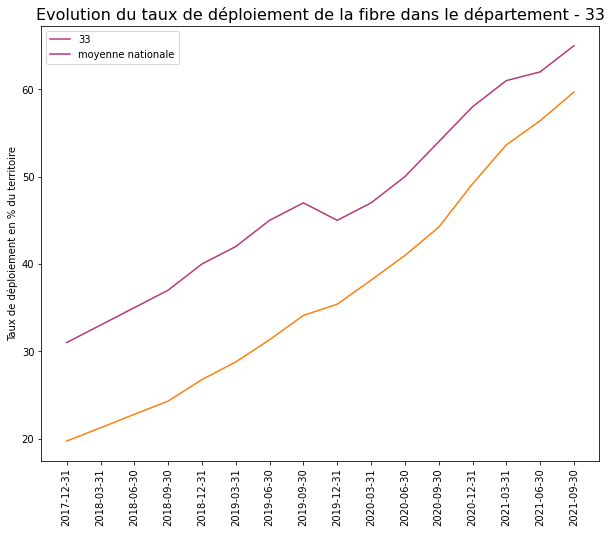

In [ ]:
# Evolution de la couverture par département

n = input('Entrer le numéro du département :')

df_det_dept = detail_1[detail_1['code_departement']==n].reset_index(drop = True)

fig3 = plt.figure(figsize= (10,8))
fig3 = sns.lineplot(data=df_det_dept, x = 'date', y = 'valeur', hue = 'code_departement', palette= 'magma')
fig3 = sns.lineplot(data = pd.DataFrame(detail_1.groupby(by='date').valeur.agg('mean')), x = 'date', y = 'valeur' )
fig3 = plt.title (f'Evolution du taux de déploiement de la fibre dans le département - {n}', size = 16)
fig3 = plt.legend([f'{n}','moyenne nationale'])
fig3 = plt.xlabel('')
fig3 = plt.ylabel('Taux de déploiement en % du territoire')
fig3 = plt.xticks(rotation='vertical')
plt.show


## Analyse des écarts entre départements

In [ ]:
# je compare la moyenne de couverture entre valeur_actuelle (2021 ou 31/12/2020) et valeur_progression (30/09/2020) (la mediane donne un résultat équivalent)
print('le taux moyen de couverture en 2020 :', df_1.progression_derniere_maj.mean())
print('le taux moyen de couverture en 2021 :', round(df_1.valeur_actuelle.mean(),2))

le taux moyen de couverture en 2020 : 44.65
le taux moyen de couverture en 2021 : 59.1


In [ ]:
# # je compare la moyenne de du taux de progression :
moy=df_1.pourcentage_progression_derniere_maj.mean()
print('en moyenne, quelle est le taux de progression', moy)

en moyenne, quelle est le taux de progression 47.1


In [ ]:
# quels sont les départements avec le plus fort taux de progression récent et quelle est leur taux de couverture
# en dehors de la Corrèze, ce sont des départements avec une faible couverture comparée au 80% d'objectif national.

top_progression = df_1[df_1['pourcentage_progression_derniere_maj']>moy].sort_values(by='pourcentage_progression_derniere_maj',ascending = False)\
                  [['libelle_departement','pourcentage_progression_derniere_maj','valeur_actuelle']].reset_index(drop=True)

top_progression

,libelle_departement,pourcentage_progression_derniere_maj,valeur_actuelle
0,Corrèze,241.0,92.0
1,Alpes-de-Haute-Provence,180.0,42.0
2,Creuse,164.0,37.0
3,Hautes-Alpes,160.0,39.0
4,Ardèche,144.0,22.0
5,Haute-Saône,133.0,28.0
6,Vosges,123.0,49.0
7,Haute-Marne,121.0,53.0
8,Tarn,104.0,51.0
9,Aude,103.0,59.0


In [ ]:
# moins d'écart à la moyenne, des progressions et couvertures donc plus ressemblantes et taux de couverture moins élevés
np.std(top_progression[1:].valeur_actuelle)

12.575343866328323

In [ ]:
np.std(df_1.valeur_actuelle)

20.30583243068041

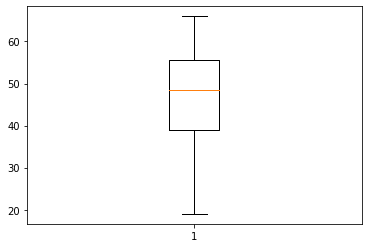

In [ ]:
plt.boxplot(top_progression[1:].valeur_actuelle)
plt.show()

<function matplotlib.pyplot.show>

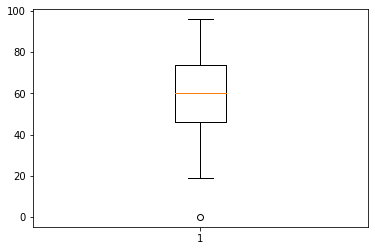

In [ ]:
plt.boxplot(df_1.valeur_actuelle)
plt.show

In [ ]:
df_1.columns

Index(['mesure', 'indicateur', 'id_indicateur', 'code_departement',
       'libelle_departement', 'valeur_actuelle', 'date_valeur_actuelle',
       'valeur_initiale', 'date_valeur_initiale', 'progression',
       'pourcentage_progression', 'progression_derniere_maj',
       'pourcentage_progression_derniere_maj', 'progression_derniere_maj_date',
       'cible', 'pourcentage_cible', 'date_cible', 'unite'],
      dtype='object')

In [ ]:
print(df_1.date_valeur_initiale.unique())
print(df_1.progression_derniere_maj_date.unique())
print(df_1.date_valeur_actuelle.unique())

[2017]
[2020    0]
[2021 2020]


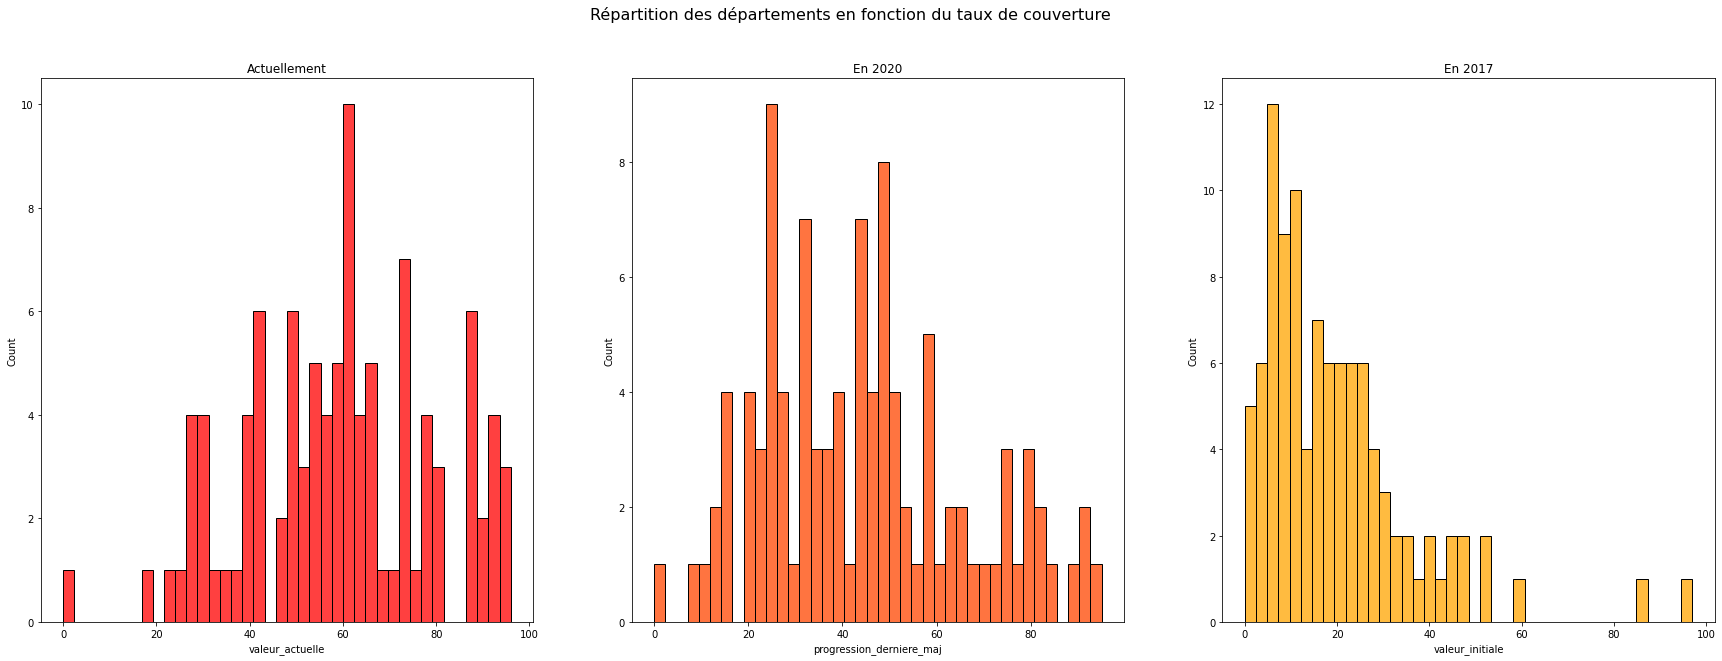

In [ ]:
fig1, ax = plt.subplots(figsize = (30,10))
fig1.suptitle("Répartition des départements en fonction du taux de couverture", fontsize=16)

ax1 = plt.subplot(131)
ax1 = sns.histplot(data = df_1, x = "valeur_actuelle", color = 'red', bins = 40)
ax1.set_title("Actuellement")

ax2 = plt.subplot(132)
ax2 = sns.histplot(data = df_1, x = "progression_derniere_maj", color = 'orangered', bins = 40)
ax2.set_title("En 2020")

ax3 = plt.subplot(133)
ax3 = sns.histplot(data = df_1, x = "valeur_initiale", color = 'orange', bins = 40)
ax3.set_title("En 2017")

fig1.show()

pour cette mesure, il semble que les départements qui avaient un certain retard concernant l'atteinte des objectifs nationaux ont tendance à progresser plus vite.

## export des bases nettoyées et avec données num

In [ ]:
detail_1.to_csv('internet-detail.csv', index = False)

In [ ]:
df_1.to_csv('internet.csv', index = False)

# Doubler le nombre de maisons de santé et de centres de santé dans les territoires (2 indicateurs : Nombre de centres de santé + Nombre de maisons de santé pluri-professionnelles)

In [ ]:
df_2 = df[df['mesure']== 'Doubler le nombre de maisons de santé et de centres de santé dans les territoires'].reset_index(drop = True)
df_2.head(2)

,mesure,indicateur,id_indicateur,code_departement,libelle_departement,valeur_actuelle,date_valeur_actuelle,valeur_initiale,date_valeur_initiale,progression,pourcentage_progression,progression_derniere_maj,pourcentage_progression_derniere_maj,progression_derniere_maj_date,cible,pourcentage_cible,date_cible,unite
0,Doubler le nombre de maisons de santé et de ce...,Nombre de maisons de santé pluri-professionnelles,nb-maisons-sante,01,Ain,31.0,2021-06-30,21.0,2017-06-30,10.0,48.0,30.0,3.0,2020-06-30,30.0,100.0,2022-12-31,maisons de santé
1,Doubler le nombre de maisons de santé et de ce...,Nombre de centres de santé,nb-centres-sante,01,Ain,2.0,2021-06-30,1.0,2017-12-31,1.0,100.0,NaN,NaN,NaN,5.0,25.0,2022-12-31,centres de santé


In [ ]:
detail_2 = detail[detail['mesure']== 'Doubler le nombre de maisons de santé et de centres de santé dans les territoires'].reset_index(drop = True)
detail_2

,mesure,indicateur,id_indicateur,code_departement,libelle_departement,date,valeur,unite
0,Doubler le nombre de maisons de santé et de ce...,Nombre de centres de santé,nb-centres-sante,01,Ain,2017-12-31,1,centres de santé
1,Doubler le nombre de maisons de santé et de ce...,Nombre de centres de santé,nb-centres-sante,01,Ain,2018-12-31,1,centres de santé
2,Doubler le nombre de maisons de santé et de ce...,Nombre de centres de santé,nb-centres-sante,01,Ain,2019-12-31,1,centres de santé
3,Doubler le nombre de maisons de santé et de ce...,Nombre de centres de santé,nb-centres-sante,01,Ain,2020-12-31,2,centres de santé
4,Doubler le nombre de maisons de santé et de ce...,Nombre de centres de santé,nb-centres-sante,01,Ain,2021-06-30,2,centres de santé
...,...,...,...,...,...,...,...,...
1331,Doubler le nombre de maisons de santé et de ce...,Nombre de maisons de santé pluri-professionnelles,nb-maisons-sante,976,Mayotte,2019-06-30,2,maisons de santé
1332,Doubler le nombre de maisons de santé et de ce...,Nombre de maisons de santé pluri-professionnelles,nb-maisons-sante,976,Mayotte,2019-12-31,3,maisons de santé
1333,Doubler le nombre de maisons de santé et de ce...,Nombre de maisons de santé pluri-professionnelles,nb-maisons-sante,976,Mayotte,2020-06-30,3,maisons de santé
1334,Doubler le nombre de maisons de santé et de ce...,Nombre de maisons de santé pluri-professionnelles,nb-maisons-sante,976,Mayotte,2020-12-31,4,maisons de santé


## Fill na / types

In [ ]:
df_2.isnull().sum()

mesure                                    0
indicateur                                0
id_indicateur                             0
code_departement                          0
libelle_departement                       0
valeur_actuelle                           0
date_valeur_actuelle                      0
valeur_initiale                          26
date_valeur_initiale                     26
progression                              26
pourcentage_progression                  39
progression_derniere_maj                101
pourcentage_progression_derniere_maj    101
progression_derniere_maj_date           101
cible                                     0
pourcentage_cible                        27
date_cible                                0
unite                                     0
dtype: int64

In [ ]:
# je remplace les valeurs null par 0 car il semble qu'il n'y avait pas d'établissement et pas de création
df_2.fillna(0, inplace=True)

In [ ]:
# Je vérifie les types de données des colonnes
df_2.dtypes

mesure                                   object
indicateur                               object
id_indicateur                            object
code_departement                         object
libelle_departement                      object
valeur_actuelle                         float64
date_valeur_actuelle                     object
valeur_initiale                         float64
date_valeur_initiale                     object
progression                             float64
pourcentage_progression                 float64
progression_derniere_maj                float64
pourcentage_progression_derniere_maj    float64
progression_derniere_maj_date            object
cible                                   float64
pourcentage_cible                       float64
date_cible                               object
unite                                    object
dtype: object

In [ ]:
df_2.cible = df_2.cible.apply(int)
df_2.pourcentage_cible = df_2.pourcentage_cible.apply(int)
df_2.valeur_actuelle = df_2.valeur_actuelle.apply(int)
df_2.valeur_initiale  = df_2.valeur_initiale .apply(int)

In [ ]:
# Je vérifie les types de données des colonnes
detail_2.dtypes

In [ ]:
detail_2.valeur = detail_2.valeur.apply(int)

In [ ]:
from datetime import datetime

df_2['date_valeur_initiale'] = df_2['date_valeur_initiale'].apply(lambda x : datetime.strptime(str(x),'%Y-%m-%d') if x !=0 else 0)
df_2['date_valeur_actuelle'] = df_2['date_valeur_actuelle'].apply(lambda x : datetime.strptime(str(x),'%Y-%m-%d')if x !=0 else 0)
df_2['progression_derniere_maj_date'] = df_2['progression_derniere_maj_date'].apply(lambda x : datetime.strptime(str(x),'%Y-%m-%d')if x !=0 else 0)

In [ ]:
df_2['date_valeur_initiale'] = df_2['date_valeur_initiale'].apply(lambda x : x.year if x !=0 else 0)
df_2['date_valeur_actuelle'] = df_2['date_valeur_actuelle'].apply(lambda x : x.year if x !=0 else 0)
df_2['progression_derniere_maj_date'] = df_2['progression_derniere_maj_date'].apply(lambda x : x.year if x !=0 else 0)

## Taux d'avancement / taux de progression par département

In [ ]:
n = input('Entrer le numéro du département :')

df_a = df_2[(df_2['code_departement']==n)&(df_2['unite']=='maisons de santé')].reset_index(drop = True)
df_b = df_2[(df_2['code_departement']==n)&(df_2['unite']=='centres de santé')].reset_index(drop = True)

# Taux d'avancement
value1 = int(df_a['pourcentage_cible'])
value2 = int(df_b['pourcentage_cible'])

# progression 20/21
value3 = int(df_a['pourcentage_progression_derniere_maj'])
value4 = int(df_b['pourcentage_progression_derniere_maj'])

# Nombre d'établissmeents et évolutions
dates_a = [df_a.loc[0,'date_valeur_initiale'], df_a.loc[0,'date_valeur_actuelle'],df_a.loc[0,'progression_derniere_maj_date']]
dates_b = [df_b.loc[0,'date_valeur_initiale'], df_b.loc[0,'date_valeur_actuelle'],df_b.loc[0,'progression_derniere_maj_date']]

values_a = [int(df_a.loc[0,'valeur_initiale']), int(df_a.loc[0,'valeur_actuelle']),int(df_a.loc[0,'progression_derniere_maj'])]
values_b = [int(df_b.loc[0,'valeur_initiale']), int(df_b.loc[0,'valeur_actuelle']),int(df_b.loc[0,'progression_derniere_maj'])]

Entrer le numéro du département :33


In [ ]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Indicator(
    value = value1,
    title = {'text': "Taux d'avancement pour les maisons de santé"},
    domain = {'row': 0, 'column': 0},
    gauge_axis_range=[0,100]))

fig.add_trace(go.Indicator(
    value = value2,
    title = {'text': "Taux d'avancement pour les centres de santé"},
    domain = {'row': 0, 'column': 1},
    gauge_axis_range=[0,100]))


fig.add_trace(go.Indicator(
    value = value3,
    title = {'text': "Taux de progression 20/21 pour les maisons de santé"},
    domain = {'row': 1, 'column': 0},
    gauge_axis_range=[0,100]))

fig.add_trace(go.Indicator(
    value = value4,
    title = {'text': "Taux de progression 20/21 pour les centres de santé"},
    domain = {'row': 1, 'column': 1},
    gauge_axis_range=[0,100]))


fig.update_layout(
    grid = {'rows': 2, 'columns': 2, 'pattern': "independent"},
    template = {'data' : {'indicator': [{
                                'mode' : "number+gauge",
                                'delta' : {'reference': 90},
                                'number':{'suffix':'%'}}]},
                                })



fig.show()

In [ ]:
fig = go.Figure(data=[
    go.Bar(name='Maisons de santé', x=dates_a, y=values_a),
    go.Bar(name='Centres de santé', x=dates_b, y=values_b)
])

fig.update_layout(barmode='stack',
    title="Nombre de maisons et centres de santé",
    font=dict(
        size=18,
        color="RebeccaPurple"
    )
)
fig.update_xaxes(range=[2016,2022])

fig.show()

## Répartition

In [ ]:
detail_2_a = detail_2[detail_2.unite == 'maisons de santé']
detail_2_b = detail_2[detail_2.unite == 'centres de santé']

In [ ]:
df_2_a = df_2[df_2.unite == 'maisons de santé']
df_2_b = df_2[df_2.unite == 'centres de santé']

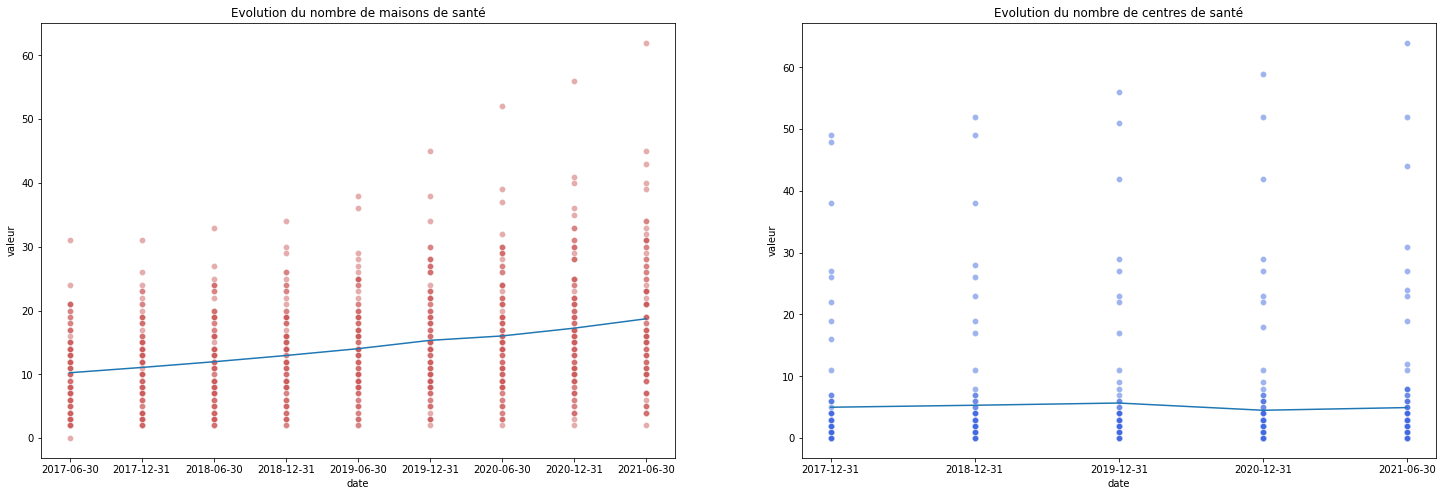

In [ ]:
fig4, ax = plt.subplots(figsize = (25,8))


ax1 = plt.subplot(121)
ax1 = sns.scatterplot(data = detail_2_a, x = "date", y = "valeur",color = 'indianred', alpha = 0.5) # alpha permet de donner de l'opacité en fonction de la densité (beaucoup de données équivalentes ou pas)
ax1 = sns.lineplot(data = pd.DataFrame(detail_2_a.groupby(by='date').valeur.agg('mean')), x = 'date', y = 'valeur' )
ax1.set_title("Evolution du nombre de maisons de santé")               

ax2 = plt.subplot(122)
ax2 = sns.scatterplot(data = detail_2_b, x = "date", y = "valeur", color = 'royalblue',alpha = 0.5)
ax2 = sns.lineplot(data = pd.DataFrame(detail_2_b.groupby(by='date').valeur.agg('mean')), x = 'date', y = 'valeur' )
ax2.set_title("Evolution du nombre de centres de santé") 


fig4.show()

In [ ]:
# # je compare la moyenne de du taux de progression :
moy=df_a.pourcentage_progression_derniere_maj.mean()
print('en moyenne, quelle est le taux de progression', moy)

en moyenne, quelle est le taux de progression 13.0


## Taux d'avancement

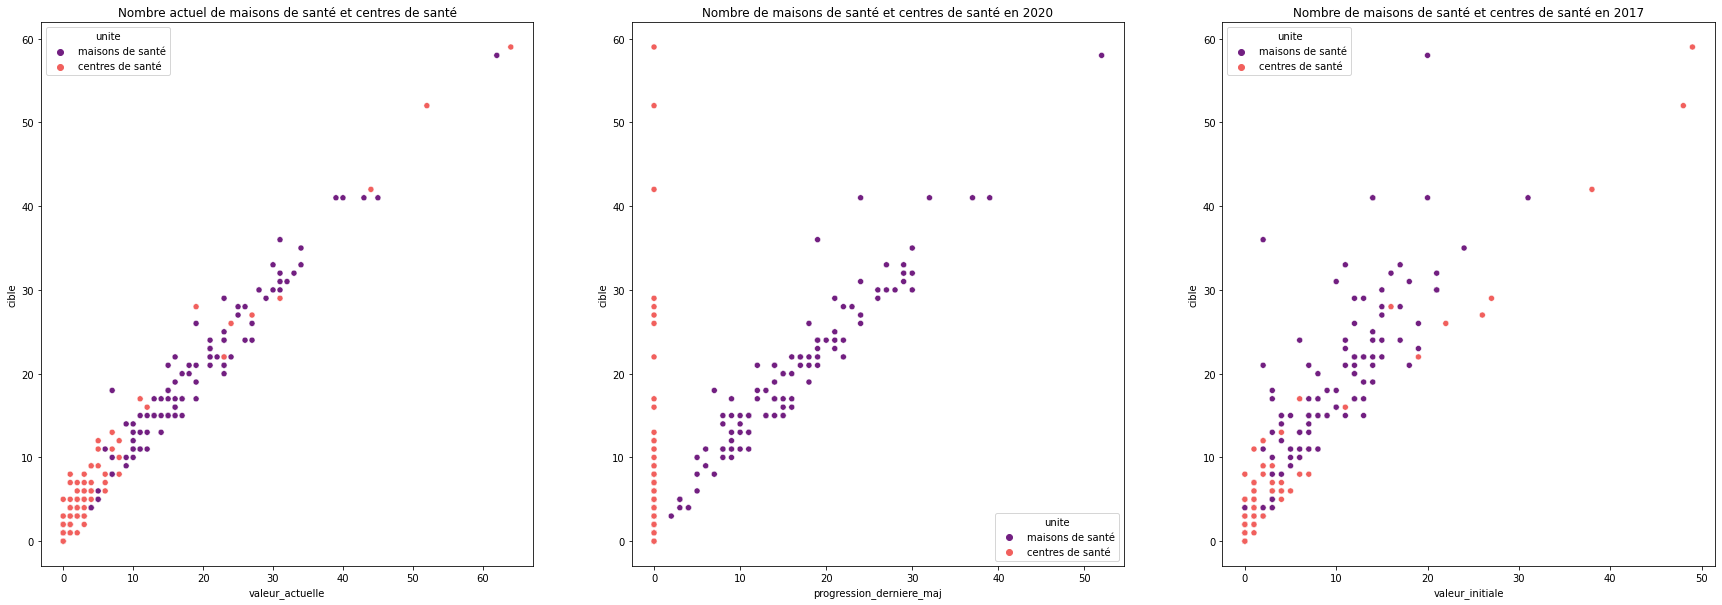

In [ ]:
fig4, ax = plt.subplots(figsize = (30,10))

ax1 = plt.subplot(131)
ax1 = sns.scatterplot(data = df_2, x = "valeur_actuelle", y = "cible",palette = 'magma', hue = 'unite')
ax1.set_title("Nombre actuel de maisons de santé et centres de santé")

ax2 = plt.subplot(132)
ax2 = sns.scatterplot(data = df_2, x = "progression_derniere_maj", y = "cible",palette = 'magma', hue = 'unite')
ax2.set_title("Nombre de maisons de santé et centres de santé en 2020")

ax3 = plt.subplot(133)
ax3 = sns.scatterplot(data = df_2, x = "valeur_initiale", y = "cible",palette = 'magma', hue = 'unite')
ax3.set_title("Nombre de maisons de santé et centres de santé en 2017")

fig4.show()

On voit nettement qu'entre 2017 et 2021 (et entre 2020 et 2021 pour les maisons de santé), le nuage forme d'avantage une ligne. Ce qui montre bien une certaine unité des départements à converger vers leur cible. Avec beaucoup moins dde département très éloignés de la cible.

## export csv

In [ ]:
detail_2.to_csv('sante-detail.csv', index = False)

In [ ]:
df_2.to_csv('sante.csv', index = False)

In [ ]:
df_2.to_excel('velo.xlsx')

# Déployer le plan vélo (indicateur : nombre de kilomètres d’aménagements cyclables sécurisés)

In [ ]:
df_3 = df[df['mesure']== 'Déployer le plan vélo'].reset_index(drop = True)
df_3

,mesure,indicateur,id_indicateur,code_departement,libelle_departement,valeur_actuelle,date_valeur_actuelle,valeur_initiale,date_valeur_initiale,progression,pourcentage_progression,progression_derniere_maj,pourcentage_progression_derniere_maj,progression_derniere_maj_date,cible,pourcentage_cible,date_cible,unite
0,Déployer le plan vélo,Kilomètres d'aménagements cyclables sécurisés,km-amenagement-cyclables-securises,01,Ain,410.0,2021-09-30,269.0,2017-12-31,141.0,52.0,380.0,8.0,2020-09-30,410.0,100.0,2022-03-31,kilomètres
1,Déployer le plan vélo,Kilomètres d'aménagements cyclables sécurisés,km-amenagement-cyclables-securises,02,Aisne,303.0,2021-09-30,257.0,2017-12-31,46.0,18.0,299.0,1.0,2020-09-30,327.0,66.0,2022-03-31,kilomètres
2,Déployer le plan vélo,Kilomètres d'aménagements cyclables sécurisés,km-amenagement-cyclables-securises,03,Allier,282.0,2021-09-30,164.0,2017-12-31,118.0,72.0,246.0,15.0,2020-09-30,281.0,100.0,2022-03-31,kilomètres
3,Déployer le plan vélo,Kilomètres d'aménagements cyclables sécurisés,km-amenagement-cyclables-securises,04,Alpes-de-Haute-Provence,80.0,2021-09-30,55.0,2017-12-31,25.0,45.0,79.0,1.0,2020-09-30,84.0,86.0,2022-03-31,kilomètres
4,Déployer le plan vélo,Kilomètres d'aménagements cyclables sécurisés,km-amenagement-cyclables-securises,05,Hautes-Alpes,50.0,2021-09-30,37.0,2017-12-31,13.0,35.0,40.0,25.0,2020-09-30,45.0,100.0,2022-03-31,kilomètres
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,Déployer le plan vélo,Kilomètres d'aménagements cyclables sécurisés,km-amenagement-cyclables-securises,971,Guadeloupe,4.0,2021-09-30,0.0,2017-12-31,4.0,NaN,2.0,100.0,2020-09-30,75.0,5.0,2022-03-31,kilomètres
97,Déployer le plan vélo,Kilomètres d'aménagements cyclables sécurisés,km-amenagement-cyclables-securises,972,Martinique,8.0,2021-09-30,7.0,2017-12-31,1.0,14.0,8.0,0.0,2020-09-30,71.0,2.0,2022-03-31,kilomètres
98,Déployer le plan vélo,Kilomètres d'aménagements cyclables sécurisés,km-amenagement-cyclables-securises,973,Guyane,76.0,2021-09-30,26.0,2017-12-31,50.0,192.0,65.0,17.0,2020-09-30,69.0,100.0,2022-03-31,kilomètres
99,Déployer le plan vélo,Kilomètres d'aménagements cyclables sécurisés,km-amenagement-cyclables-securises,974,La Réunion,388.0,2021-09-30,332.0,2017-12-31,56.0,17.0,386.0,1.0,2020-09-30,410.0,72.0,2022-03-31,kilomètres


In [ ]:
detail_3 = detail[detail['mesure']== 'Déployer le plan vélo'].reset_index(drop = True)
detail_3

## fill na, types

In [ ]:
# Je vérifie les types de données des colonnes
df_3.dtypes

mesure                                   object
indicateur                               object
id_indicateur                            object
code_departement                         object
libelle_departement                      object
valeur_actuelle                         float64
date_valeur_actuelle                     object
valeur_initiale                         float64
date_valeur_initiale                     object
progression                             float64
pourcentage_progression                 float64
progression_derniere_maj                float64
pourcentage_progression_derniere_maj    float64
progression_derniere_maj_date            object
cible                                   float64
pourcentage_cible                       float64
date_cible                               object
unite                                    object
dtype: object

In [ ]:
# Je vérifie les types de données des colonnes
detail_3.dtypes

mesure                         object
indicateur                     object
id_indicateur                  object
code_departement               object
libelle_departement            object
date                   datetime64[ns]
valeur                          int64
unite                          object
dtype: object

In [ ]:
df_3.isnull().sum()

mesure                                  0
indicateur                              0
id_indicateur                           0
code_departement                        0
libelle_departement                     0
valeur_actuelle                         0
date_valeur_actuelle                    0
valeur_initiale                         0
date_valeur_initiale                    0
progression                             0
pourcentage_progression                 2
progression_derniere_maj                1
pourcentage_progression_derniere_maj    1
progression_derniere_maj_date           1
cible                                   0
pourcentage_cible                       0
date_cible                              0
unite                                   0
dtype: int64

In [ ]:
df_3.fillna(0, inplace = True)

In [ ]:
df_3['date_valeur_initiale'] = df_3['date_valeur_initiale'].apply(lambda x : datetime.strptime(str(x),'%Y-%m-%d') if x !=0 else 0)
df_3['date_valeur_actuelle'] = df_3['date_valeur_actuelle'].apply(lambda x : datetime.strptime(str(x),'%Y-%m-%d')if x !=0 else 0)
df_3['progression_derniere_maj_date'] = df_3['progression_derniere_maj_date'].apply(lambda x : datetime.strptime(str(x),'%Y-%m-%d')if x !=0 else 0)
df_3['date_valeur_initiale'] = df_3['date_valeur_initiale'].apply(lambda x : x.year if x !=0 else 0)
df_3['date_valeur_actuelle'] = df_3['date_valeur_actuelle'].apply(lambda x : x.year if x !=0 else 0)
df_3['progression_derniere_maj_date'] = df_3['progression_derniere_maj_date'].apply(lambda x : x.year if x !=0 else 0)

## Indicateurs

In [ ]:
n = input('Entrer le numéro du département :')

df_velo = df_3[df_3['code_departement']==n].reset_index(drop = True)

# Taux d'avancement
value1 = int(df_velo['pourcentage_cible'])

# progression 20/21
value3 = int(df_velo['pourcentage_progression_derniere_maj'])

# Nombre de km
dates_a = [df_velo.loc[0,'date_valeur_initiale'], df_velo.loc[0,'date_valeur_actuelle'],df_velo.loc[0,'progression_derniere_maj_date']]

values_a = [int(df_velo.loc[0,'valeur_initiale']), int(df_velo.loc[0,'valeur_actuelle']),int(df_velo.loc[0,'progression_derniere_maj'])]

Entrer le numéro du département :14


In [ ]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Indicator(
    value = value1,
    title = {'text': "Taux d'avancement"},
    domain = {'row': 0, 'column': 0},
    gauge_axis_range=[0,100]))

fig.add_trace(go.Indicator(
    value = value3,
    title = {'text': "Taux de progression 20/21 de l'aménagement cyclable sécurisé"},
    domain = {'row': 0, 'column': 1},
    gauge_axis_range=[0,100]))

fig.update_layout(
    grid = {'rows': 1, 'columns': 2, 'pattern': "independent"},
    title= {'text': "Déployer le plan vélo", 'xanchor':'left'},
    template = {'data' : {'indicator': [{
                                'mode' : "number+gauge",
                                'delta' : {'reference': 90},
                                'number':{'suffix':'%'}}]},
                                })
fig.show()

In [ ]:
fig = go.Figure(data=[
    go.Bar(x=dates_a, y=values_a)
])

fig.update_layout(barmode='stack',
    title="Nombre de kilomètres d’aménagements cyclables sécurisés",
    font=dict(
        size=18,
        color="forestgreen"
    )
)
fig.update_xaxes(range=[2016,2022])

fig.show()

## Taux d'avancement

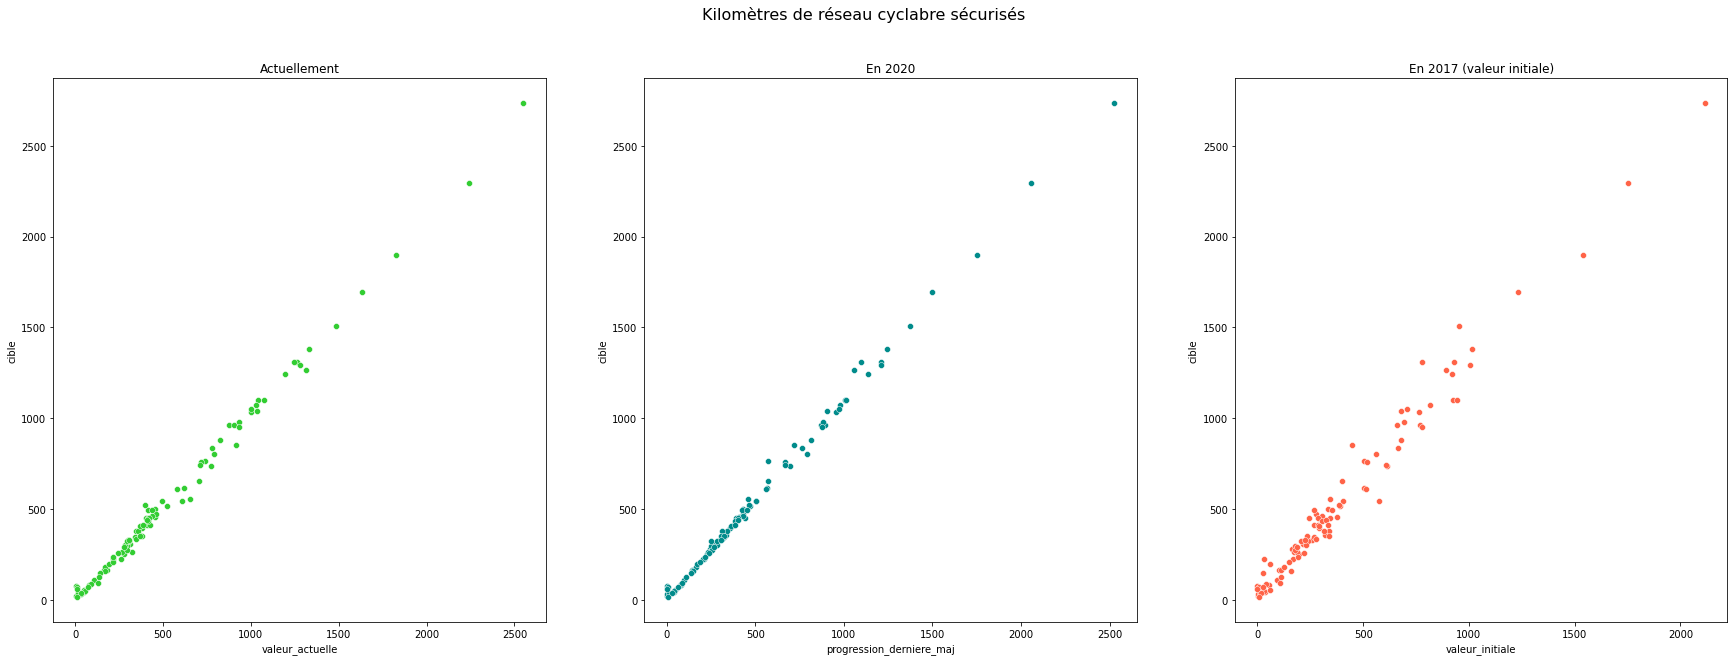

In [ ]:
fig5, ax = plt.subplots(figsize = (30,10))
fig5.suptitle('Kilomètres de réseau cyclabre sécurisés', fontsize=16)

ax1 = plt.subplot(131)
ax1 = sns.scatterplot(data = df_3, x = "valeur_actuelle", y = "cible",color = 'limegreen')
ax1.set_title("Actuellement")

ax2 = plt.subplot(132)
ax2 = sns.scatterplot(data = df_3, x = "progression_derniere_maj", y = "cible", color = 'darkcyan')
ax2.set_title("En 2020")

ax3 = plt.subplot(133)
ax3 = sns.scatterplot(data = df_3, x = "valeur_initiale", y = "cible",color = 'tomato')
ax3.set_title("En 2017 (valeur initiale)")

fig5.show()

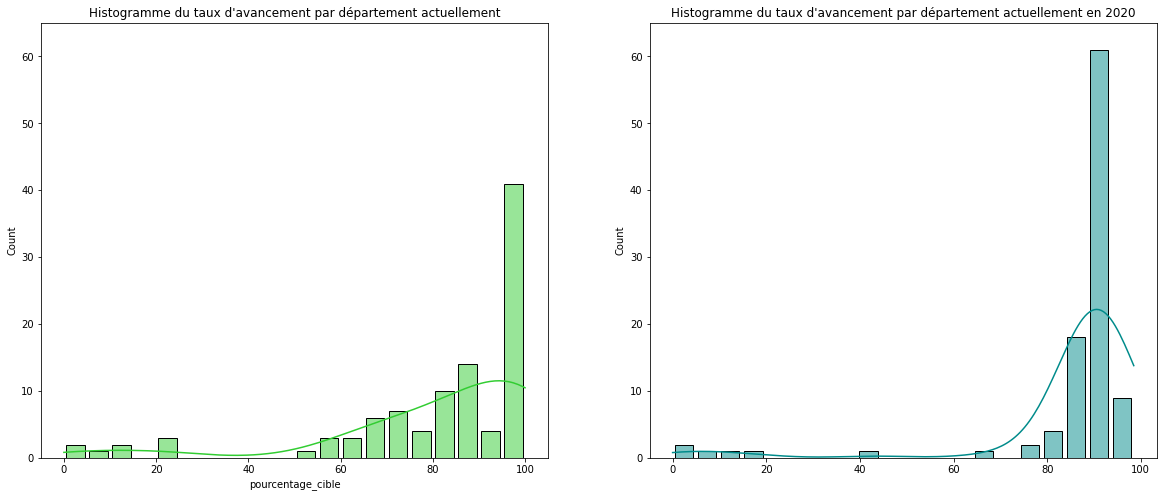

In [ ]:
# quels sont les taux d'avancement

fig6, ax = plt.subplots(figsize = (20,8))

ax1 = plt.subplot(121)
ax1 = sns.histplot(df_3.pourcentage_cible,color = 'limegreen',shrink=0.8,  multiple="dodge", kde=True, bins = 20)
ax1.set_title("Histogramme du taux d'avancement par département actuellement")
ax1.set_ylim(ymax = 65)

ax2 = plt.subplot(122)
ax2 = sns.histplot(data = df_3["progression_derniere_maj"]/df_3['cible']*100,color = 'darkcyan', shrink=0.8,  multiple="dodge", kde=True, bins = 20)
ax2.set_title("Histogramme du taux d'avancement par département actuellement en 2020")
ax2.set_ylim(ymax = 65)

fig6.show()


On observe qu'entre 2020 et 2021, il y a d'avantage de disparité entre les départeents concernant le taux d'avancement. Cependant, c'est une évolution positive car il y a eu final d'avantage de départements à avoir atteint la cible et donc aussi moins de départements dans la tranche 80-95.

In [ ]:
detail_3.to_csv('velo-detail.csv', index = False)
df_3.to_csv('velo.csv', index = False)

In [ ]:
df_3.to_excel('velo.xlsx')

#Déployer une offre France Services dans tous les territoires (indicateur : Nombre de labellisations )

In [ ]:
df_4 = df[df['mesure']== 'Déployer une offre France Services dans tous les territoires '].reset_index(drop = True)
df_4.head(3)

,mesure,indicateur,id_indicateur,code_departement,libelle_departement,valeur_actuelle,date_valeur_actuelle,valeur_initiale,date_valeur_initiale,progression,pourcentage_progression,progression_derniere_maj,pourcentage_progression_derniere_maj,progression_derniere_maj_date,cible,pourcentage_cible,date_cible,unite
0,Déployer une offre France Services dans tous l...,Nombre de labellisations (atteinte de l'object...,nb-labellisations-france-services,01,Ain,19.0,2022-03-31,1.0,2020-01-31,18.0,1800.0,6.0,217.0,2020-09-30,23.0,82.0,2022-12-31,labellisations
1,Déployer une offre France Services dans tous l...,Nombre de labellisations (atteinte de l'object...,nb-labellisations-france-services,02,Aisne,23.0,2022-03-31,4.0,2020-01-31,19.0,475.0,11.0,109.0,2020-09-30,29.0,76.0,2022-12-31,labellisations
2,Déployer une offre France Services dans tous l...,Nombre de labellisations (atteinte de l'object...,nb-labellisations-france-services,03,Allier,17.0,2022-03-31,7.0,2020-01-31,10.0,143.0,9.0,89.0,2020-09-30,24.0,59.0,2022-12-31,labellisations


In [ ]:
detail_4 = detail[detail['mesure']== 'Déployer une offre France Services dans tous les territoires '].reset_index(drop = True)
detail_4

,mesure,indicateur,id_indicateur,code_departement,libelle_departement,date,valeur,unite
0,Déployer une offre France Services dans tous l...,Nombre de labellisations (atteinte de l'object...,nb-labellisations-france-services,01,Ain,2020-01-31,1,labellisations
1,Déployer une offre France Services dans tous l...,Nombre de labellisations (atteinte de l'object...,nb-labellisations-france-services,01,Ain,2020-02-29,3,labellisations
2,Déployer une offre France Services dans tous l...,Nombre de labellisations (atteinte de l'object...,nb-labellisations-france-services,01,Ain,2020-03-31,3,labellisations
3,Déployer une offre France Services dans tous l...,Nombre de labellisations (atteinte de l'object...,nb-labellisations-france-services,01,Ain,2020-04-30,3,labellisations
4,Déployer une offre France Services dans tous l...,Nombre de labellisations (atteinte de l'object...,nb-labellisations-france-services,01,Ain,2020-05-31,3,labellisations
...,...,...,...,...,...,...,...,...
2722,Déployer une offre France Services dans tous l...,Nombre de labellisations (atteinte de l'object...,nb-labellisations-france-services,976,Mayotte,2021-11-30,10,labellisations
2723,Déployer une offre France Services dans tous l...,Nombre de labellisations (atteinte de l'object...,nb-labellisations-france-services,976,Mayotte,2021-12-31,10,labellisations
2724,Déployer une offre France Services dans tous l...,Nombre de labellisations (atteinte de l'object...,nb-labellisations-france-services,976,Mayotte,2022-01-31,10,labellisations
2725,Déployer une offre France Services dans tous l...,Nombre de labellisations (atteinte de l'object...,nb-labellisations-france-services,976,Mayotte,2022-02-28,10,labellisations


## Fill na et types

In [ ]:
# Je vérifie les types de données des colonnes
df_4.dtypes

mesure                                   object
indicateur                               object
id_indicateur                            object
code_departement                         object
libelle_departement                      object
valeur_actuelle                         float64
date_valeur_actuelle                     object
valeur_initiale                         float64
date_valeur_initiale                     object
progression                             float64
pourcentage_progression                 float64
progression_derniere_maj                float64
pourcentage_progression_derniere_maj    float64
progression_derniere_maj_date            object
cible                                   float64
pourcentage_cible                       float64
date_cible                               object
unite                                    object
dtype: object

In [ ]:
# Je vérifie les types de données des colonnes
detail_4.dtypes

mesure                 object
indicateur             object
id_indicateur          object
code_departement       object
libelle_departement    object
date                   object
valeur                  int64
unite                  object
dtype: object

In [ ]:
df_4.isnull().sum()

mesure                                  0
indicateur                              0
id_indicateur                           0
code_departement                        0
libelle_departement                     0
valeur_actuelle                         0
date_valeur_actuelle                    0
valeur_initiale                         0
date_valeur_initiale                    0
progression                             0
pourcentage_progression                 0
progression_derniere_maj                0
pourcentage_progression_derniere_maj    0
progression_derniere_maj_date           0
cible                                   0
pourcentage_cible                       0
date_cible                              0
unite                                   0
dtype: int64

In [ ]:
df_4.fillna(0,inplace = True)

In [ ]:
df_4['date_valeur_initiale'] = df_4['date_valeur_initiale'].apply(lambda x : datetime.strptime(str(x),'%Y-%m-%d') if x !=0 else 0)
df_4['date_valeur_actuelle'] = df_4['date_valeur_actuelle'].apply(lambda x : datetime.strptime(str(x),'%Y-%m-%d')if x !=0 else 0)
df_4['progression_derniere_maj_date'] = df_4['progression_derniere_maj_date'].apply(lambda x : datetime.strptime(str(x),'%Y-%m-%d')if x !=0 else 0)
df_4['date_valeur_initiale'] = df_4['date_valeur_initiale'].apply(lambda x : x.year if x !=0 else 0)
df_4['date_valeur_actuelle'] = df_4['date_valeur_actuelle'].apply(lambda x : x.year if x !=0 else 0)
df_4['progression_derniere_maj_date'] = df_4['progression_derniere_maj_date'].apply(lambda x : x.year if x !=0 else 0)

## Indicateurs

In [ ]:
n = input('Entrez le numéro du département :')

df_service = df_4[df_4['code_departement']==n].reset_index(drop = True)

# Taux d'avancement
value1 = int(df_service['pourcentage_cible'])

# progression 20/21
value3 = int(df_service['pourcentage_progression_derniere_maj'])

# Nombre de labellisations
dates_a = [df_service.loc[0,'date_valeur_initiale'], df_service.loc[0,'date_valeur_actuelle'],df_service.loc[0,'progression_derniere_maj_date']]

values_a = [int(df_service.loc[0,'valeur_initiale']), int(df_service.loc[0,'valeur_actuelle']),int(df_service.loc[0,'progression_derniere_maj'])]

Entrez le numéro du département :22


In [ ]:
df_service

,mesure,indicateur,id_indicateur,code_departement,libelle_departement,valeur_actuelle,date_valeur_actuelle,valeur_initiale,date_valeur_initiale,progression,pourcentage_progression,progression_derniere_maj,pourcentage_progression_derniere_maj,progression_derniere_maj_date,cible,pourcentage_cible,date_cible,unite
0,Déployer une offre France Services dans tous l...,Nombre de labellisations (atteinte de l'object...,nb-labellisations-france-services,22,Côtes-d'Armor,26.0,2022,4.0,2020,22.0,550.0,5.0,420.0,2020,32.0,79.0,2022-12-31,labellisations


In [ ]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Indicator(
    value = value1,
    title = {'text': "Taux d'avancement"},
    domain = {'row': 0, 'column': 0},
    gauge_axis_range=[0,100]))

fig.add_trace(go.Indicator(
    value = value3,
    title = {'text': "Taux de progression 20/21 des labellisations France Services"},
    domain = {'row': 0, 'column': 1},
    gauge_axis_range=[0,100]))

fig.update_layout(
    grid = {'rows': 1, 'columns': 2, 'pattern': "independent"},
    title= {'text': "Déployer une offre France Services dans tous les territoires", 'xanchor':'left'},
    template = {'data' : {'indicator': [{
                                'mode' : "number+gauge",
                                'delta' : {'reference': 90},
                                'number':{'suffix':'%'}}]},
                                })
fig.show()

In [ ]:
fig = go.Figure(data=[
    go.Bar(x=dates_a, y=values_a)
])

fig.update_layout(barmode='stack',
    title="Nombre de labellisations",
    font=dict(
        size=18,
        color="forestgreen"
    )
)
fig.update_xaxes(range=[2019,2021.5])

fig.show()

In [ ]:
detail_4.dtypes

mesure                         object
indicateur                     object
id_indicateur                  object
code_departement               object
libelle_departement            object
date                   datetime64[ns]
valeur                          int64
unite                          object
dtype: object

Entrer le numéro du département :56


<function matplotlib.pyplot.show>

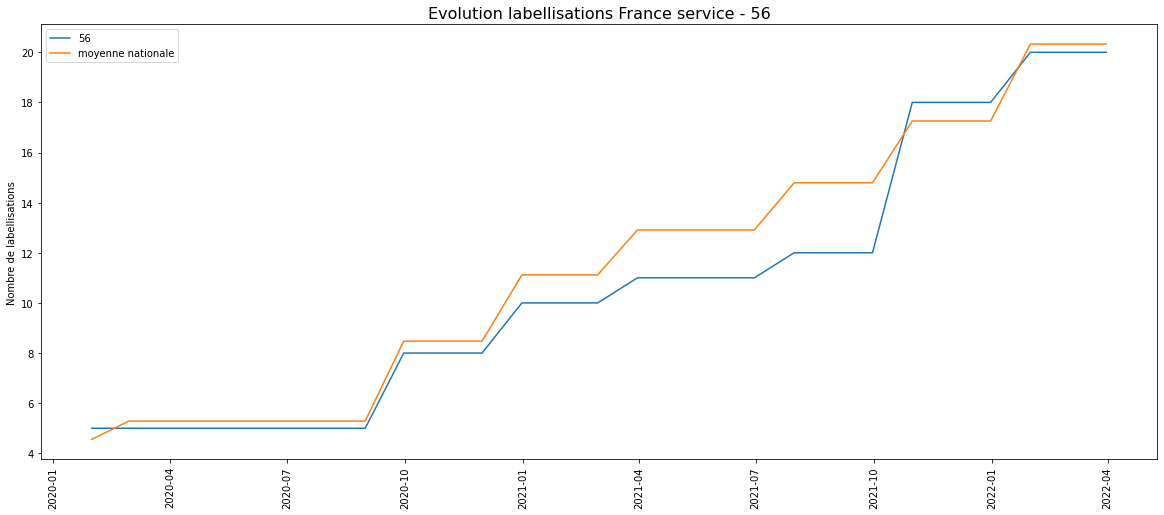

In [ ]:
# Evolution des labellisations par département

n = input('Entrer le numéro du département :')

df_det_dept = detail_4[detail_4['code_departement']==n].reset_index(drop = True)

fig3 = plt.figure(figsize= (20,8))
fig3 = sns.lineplot(data=df_det_dept, x = 'date', y = 'valeur', palette = 'viridis')
fig3 = sns.lineplot(data = pd.DataFrame(detail_4.groupby(by='date').valeur.agg('mean')), x = 'date', y = 'valeur' )
fig3 = plt.title (f'Evolution labellisations France service - {n}', size = 16)
fig3 = plt.legend([f'{n}','moyenne nationale'])
fig3 = plt.xlabel('')
fig3 = plt.ylabel('Nombre de labellisations')
fig3 = plt.xticks(rotation='vertical')
plt.show

## Taux d'avancement

In [ ]:
df_4.date_valeur_initiale.unique()

array([2020])

In [ ]:
df_4.progression_derniere_maj_date.value_counts()

2020    100
0         1
Name: progression_derniere_maj_date, dtype: int64

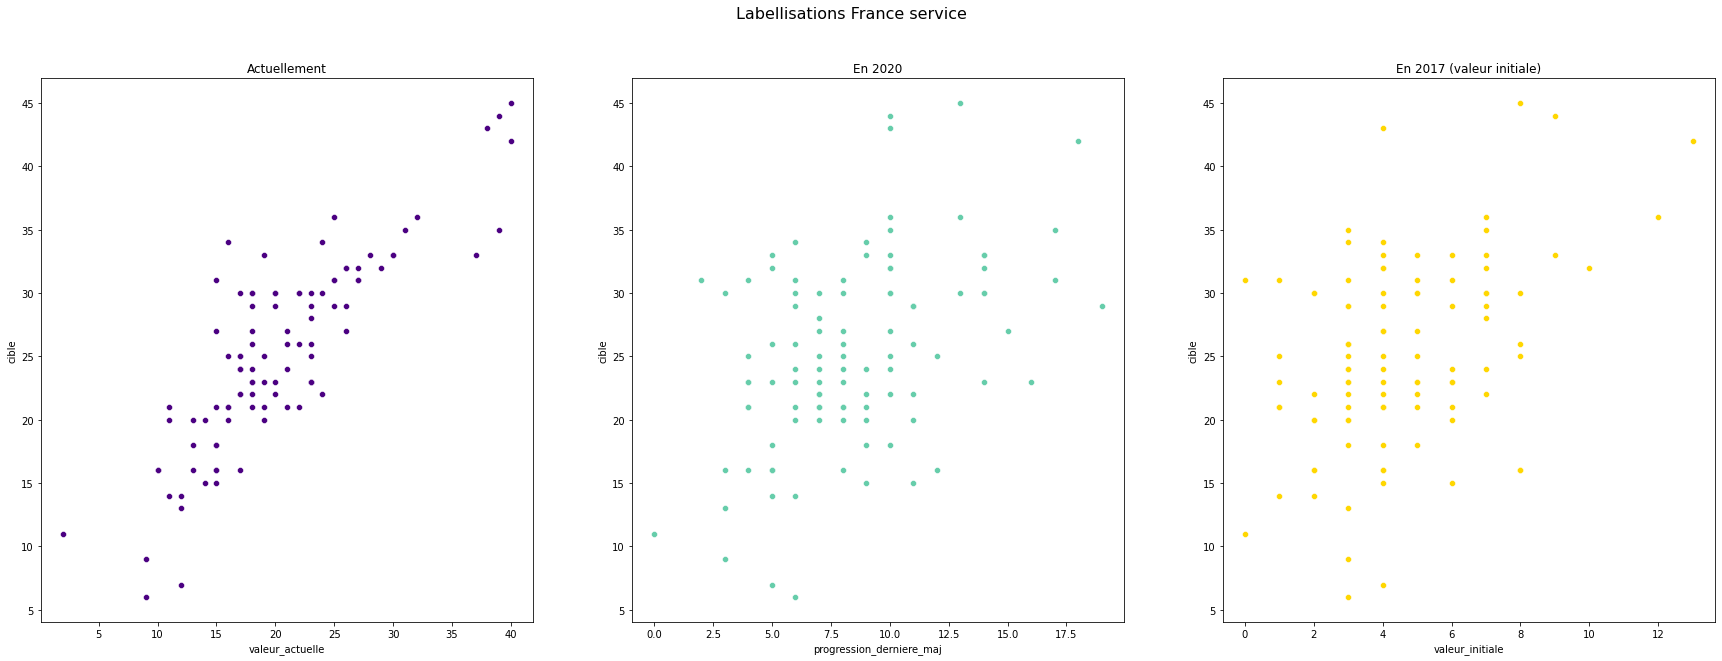

In [ ]:
fig7, ax = plt.subplots(figsize = (30,10))
fig7.suptitle('Labellisations France service', fontsize=16)

ax1 = plt.subplot(131)
ax1 = sns.scatterplot(data = df_4, x = "valeur_actuelle", y = "cible",color = 'indigo')
ax1.set_title("Actuellement")

ax2 = plt.subplot(132)
ax2 = sns.scatterplot(data = df_4, x = "progression_derniere_maj", y = "cible", color = 'mediumaquamarine')
ax2.set_title("En 2020")

ax3 = plt.subplot(133)
ax3 = sns.scatterplot(data = df_4, x = "valeur_initiale", y = "cible",color = 'gold')
ax3.set_title("En 2020 (valeur initiale)")

fig7.show()

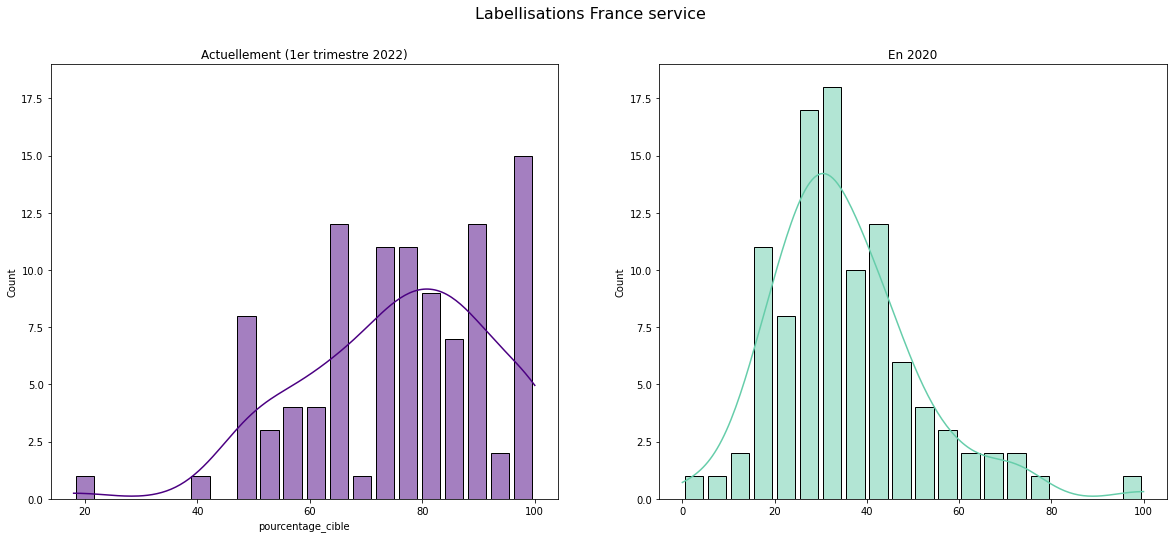

In [ ]:
# quels sont les taux d'avancement

fig8, ax = plt.subplots(figsize = (20,8))
fig8.suptitle('Labellisations France service', fontsize=16)

ax1 = plt.subplot(121)
ax1 = sns.histplot(df_4.pourcentage_cible,color = 'indigo',shrink=0.8,  multiple="dodge", kde=True, bins = 20)
ax1.set_title("Actuellement (1er trimestre 2022)")
ax1.set_ylim(ymax = 19)

ax2 = plt.subplot(122)
ax2 = sns.histplot(data = df_4["progression_derniere_maj"]/df_4['cible']*100,color = 'mediumaquamarine', shrink=0.8,  multiple="dodge", kde=True, bins = 20)
ax2.set_title("En 2020")
ax2.set_ylim(ymax = 19)

fig8.show()


In [ ]:
print("Nombre de département ayant un taux d'avancement de plus de 80% :",len(df_4[df_4['pourcentage_cible']>=80]),'soit',round(len(df_4[df_4['pourcentage_cible']>=80])/len(df_4)*100,2),'% des départements français.')

Nombre de département ayant un taux d'avancement de plus de 80% : 45 soit 44.55 % des départements français.


Une évolution que l'on ne peut juger que sur 2 années mais une évolution très rapide puisque 45% des départements ont aujourd'hui un taux d'avancement élevé (+ de 80%).

Entre 2020 et 2022, il y a un étalement des valeurs vers des taux plus élevés. On va donc dans le sens d'une convergence des départements pour cette mesure.

In [ ]:
detail_4.to_csv('service-detail.csv', index = False)
df_4.to_csv('service.csv', index = False)

# Simplifier l’accès aux droits des personnes handicapées

indicateur : Durée moyenne de traitement pour les demandes d’allocation adulte handicapé

In [ ]:
df_5 = df[df['mesure']== 'Simplifier l’accès aux droits des personnes handicapées'].reset_index(drop = True)
df_5.head(3)

,mesure,indicateur,id_indicateur,code_departement,libelle_departement,valeur_actuelle,date_valeur_actuelle,valeur_initiale,date_valeur_initiale,progression,pourcentage_progression,progression_derniere_maj,pourcentage_progression_derniere_maj,progression_derniere_maj_date,cible,pourcentage_cible,date_cible,unite
0,Simplifier l’accès aux droits des personnes ha...,Durée moyenne de traitement pour les demandes ...,duree-moyenne-traitement-demandes-allocation-a...,01,Ain,4.81,2021-06-30,4.4,2017-12-31,0.0,9.0,6.2,-22.0,2020-09-30,3.0,0.0,2022-12-31,mois de traitement
1,Simplifier l’accès aux droits des personnes ha...,Durée moyenne de traitement pour les demandes ...,duree-moyenne-traitement-demandes-allocation-a...,02,Aisne,5.33,2021-06-30,4.5,2017-12-31,1.0,18.0,5.9,-10.0,2019-12-31,3.0,0.0,2022-12-31,mois de traitement
2,Simplifier l’accès aux droits des personnes ha...,Durée moyenne de traitement pour les demandes ...,duree-moyenne-traitement-demandes-allocation-a...,03,Allier,5.10,2021-06-30,4.3,2017-12-31,1.0,19.0,6.9,-26.0,2020-09-30,3.0,0.0,2022-12-31,mois de traitement


In [ ]:
detail_5 = detail[detail['mesure']== 'Simplifier l’accès aux droits des personnes handicapées'].reset_index(drop = True)
detail_5

,mesure,indicateur,id_indicateur,code_departement,libelle_departement,date,valeur,unite
0,Simplifier l’accès aux droits des personnes ha...,Durée moyenne de traitement pour les demandes ...,duree-moyenne-traitement-demandes-allocation-a...,01,Ain,2017-12-31,4.40,mois de traitement
1,Simplifier l’accès aux droits des personnes ha...,Durée moyenne de traitement pour les demandes ...,duree-moyenne-traitement-demandes-allocation-a...,01,Ain,2018-12-31,5.10,mois de traitement
2,Simplifier l’accès aux droits des personnes ha...,Durée moyenne de traitement pour les demandes ...,duree-moyenne-traitement-demandes-allocation-a...,01,Ain,2019-12-31,0.00,mois de traitement
3,Simplifier l’accès aux droits des personnes ha...,Durée moyenne de traitement pour les demandes ...,duree-moyenne-traitement-demandes-allocation-a...,01,Ain,2020-09-30,6.20,mois de traitement
4,Simplifier l’accès aux droits des personnes ha...,Durée moyenne de traitement pour les demandes ...,duree-moyenne-traitement-demandes-allocation-a...,01,Ain,2020-12-31,4.80,mois de traitement
...,...,...,...,...,...,...,...,...
592,Simplifier l’accès aux droits des personnes ha...,Durée moyenne de traitement pour les demandes ...,duree-moyenne-traitement-demandes-allocation-a...,974,La Réunion,2021-03-31,4.43,mois de traitement
593,Simplifier l’accès aux droits des personnes ha...,Durée moyenne de traitement pour les demandes ...,duree-moyenne-traitement-demandes-allocation-a...,974,La Réunion,2021-06-30,4.40,mois de traitement
594,Simplifier l’accès aux droits des personnes ha...,Durée moyenne de traitement pour les demandes ...,duree-moyenne-traitement-demandes-allocation-a...,976,Mayotte,2020-09-30,9.60,mois de traitement
595,Simplifier l’accès aux droits des personnes ha...,Durée moyenne de traitement pour les demandes ...,duree-moyenne-traitement-demandes-allocation-a...,976,Mayotte,2021-03-31,4.50,mois de traitement


In [ ]:
df_5.indicateur[0]

'Durée moyenne de traitement pour les demandes d’allocation adulte handicapé'

## Fill na, types

In [ ]:
# Je vérifie les types de données des colonnes
df_5.dtypes

mesure                                   object
indicateur                               object
id_indicateur                            object
code_departement                         object
libelle_departement                      object
valeur_actuelle                         float64
date_valeur_actuelle                     object
valeur_initiale                         float64
date_valeur_initiale                     object
progression                             float64
pourcentage_progression                 float64
progression_derniere_maj                float64
pourcentage_progression_derniere_maj    float64
progression_derniere_maj_date            object
cible                                   float64
pourcentage_cible                       float64
date_cible                               object
unite                                    object
dtype: object

In [ ]:
# Je vérifie les types de données des colonnes
detail_5.dtypes

mesure                 object
indicateur             object
id_indicateur          object
code_departement       object
libelle_departement    object
date                   object
valeur                  int64
unite                  object
dtype: object

In [ ]:
df_5.isnull().sum()

mesure                                  0
indicateur                              0
id_indicateur                           0
code_departement                        0
libelle_departement                     0
valeur_actuelle                         0
date_valeur_actuelle                    0
valeur_initiale                         0
date_valeur_initiale                    0
progression                             0
pourcentage_progression                 0
progression_derniere_maj                5
pourcentage_progression_derniere_maj    5
progression_derniere_maj_date           5
cible                                   0
pourcentage_cible                       1
date_cible                              0
unite                                   0
dtype: int64

In [ ]:
df_5.fillna(0,inplace = True)

In [ ]:
df_5.cible.value_counts()

3.00    97
3.01     3
Name: cible, dtype: int64

In [ ]:
# pour quoi 3 dept à 3.01? sûrement une erreur, je passe tout à 3

df_5['cible'] = 3

In [ ]:
df_5['date_valeur_initiale'] = df_5['date_valeur_initiale'].apply(lambda x : datetime.strptime(str(x),'%Y-%m-%d') if x !=0 else 0)
df_5['date_valeur_actuelle'] = df_5['date_valeur_actuelle'].apply(lambda x : datetime.strptime(str(x),'%Y-%m-%d')if x !=0 else 0)
df_5['progression_derniere_maj_date'] = df_5['progression_derniere_maj_date'].apply(lambda x : datetime.strptime(str(x),'%Y-%m-%d')if x !=0 else 0)
df_5['date_valeur_initiale'] = df_5['date_valeur_initiale'].apply(lambda x : x.year if x !=0 else 0)
df_5['date_valeur_actuelle'] = df_5['date_valeur_actuelle'].apply(lambda x : x.year if x !=0 else 0)
df_5['progression_derniere_maj_date'] = df_5['progression_derniere_maj_date'].apply(lambda x : x.year if x !=0 else 0)

## Indicateurs par département

In [ ]:
n = input('Entrez le numéro du département :')

df_handicap = df_5[df_5['code_departement']==n].reset_index(drop = True)

# Taux d'avancement
value1 = int(df_handicap['pourcentage_cible'])

# progression 20/21
value3 = int(df_handicap['pourcentage_progression_derniere_maj'])

# Nombre de labellisations
dates_a = [df_handicap.loc[0,'date_valeur_initiale'], df_handicap.loc[0,'date_valeur_actuelle'],df_handicap.loc[0,'progression_derniere_maj_date']]

values_a = [int(df_handicap.loc[0,'valeur_initiale']), int(df_handicap.loc[0,'valeur_actuelle']),int(df_handicap.loc[0,'progression_derniere_maj'])]

Entrez le numéro du département :69


In [ ]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Indicator(
    value = value1,
    title = {'text': "Taux d'avancement"},
    domain = {'row': 0, 'column': 0},
    gauge_axis_range=[-50,100]))


fig.update_layout(
    grid = {'rows': 1, 'columns': 2, 'pattern': "independent"},
    title= {'text': 'Simplifier l’accès aux droits des personnes handicapées', 'xanchor':'left'},
    template = {'data' : {'indicator': [{
                                'mode' : "number+gauge",
                                'number':{'suffix':'%'}}]},
                                })
fig.show()

Entrer le numéro du département :85


<function matplotlib.pyplot.show>

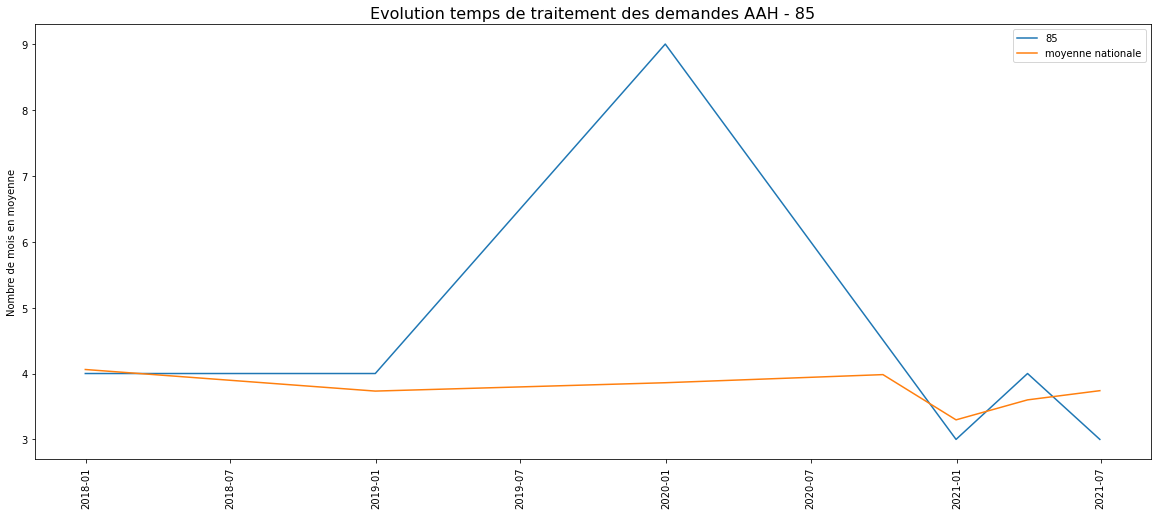

In [ ]:
# Evolution du nombre de mois pour le traitement des demandes d'allocation par département

n = input('Entrer le numéro du département :')

df_det_dept = detail_5[detail_5['code_departement']==n].reset_index(drop = True)

fig3 = plt.figure(figsize= (20,8))
fig3 = sns.lineplot(data=df_det_dept, x = 'date', y = 'valeur', palette = 'viridis')
fig3 = sns.lineplot(data = pd.DataFrame(detail_5.groupby(by='date').valeur.agg('mean')), x = 'date', y = 'valeur' )
fig3 = plt.title (f'Evolution temps de traitement des demandes AAH - {n}', size = 16)
fig3 = plt.legend([f'{n}','moyenne nationale'])
fig3 = plt.xlabel('')
fig3 = plt.ylabel('Nombre de mois en moyenne')
fig3 = plt.xticks(rotation='vertical')
plt.show

## Taux d'avancement

In [ ]:
df_5.date_valeur_initiale.value_counts()

2017    82
2018     8
2021     4
2020     3
2019     3
Name: date_valeur_initiale, dtype: int64

In [ ]:
df_5.date_valeur_actuelle.value_counts()

2021    96
2019     4
Name: date_valeur_actuelle, dtype: int64

In [ ]:
df_5.progression_derniere_maj_date.value_counts()

2020    60
2019    30
0        5
2018     4
2017     1
Name: progression_derniere_maj_date, dtype: int64

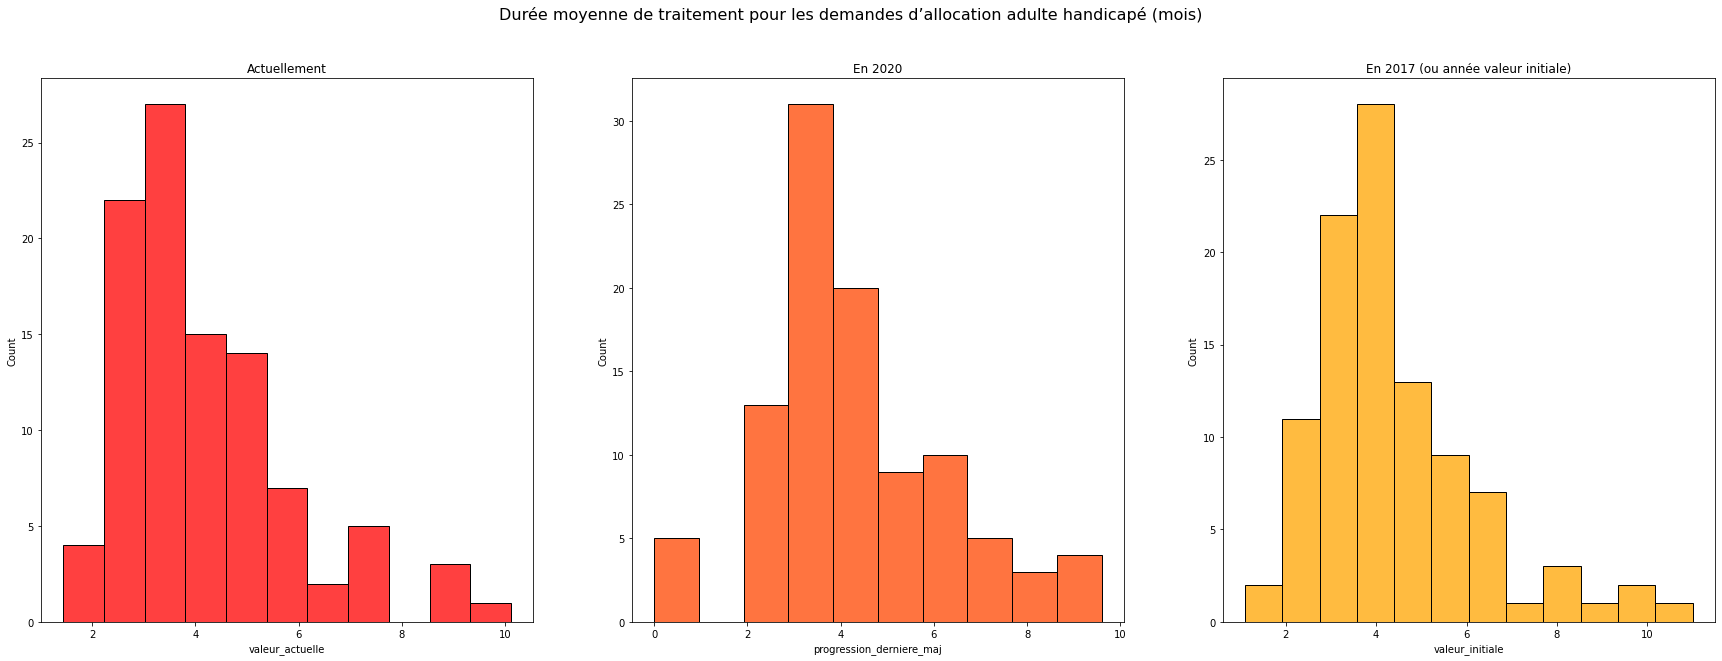

In [ ]:
fig9, ax = plt.subplots(figsize = (30,10))
fig9.suptitle("Durée moyenne de traitement pour les demandes d’allocation adulte handicapé (mois)", fontsize=16)

ax1 = plt.subplot(131)
ax1 = sns.histplot(data = df_5, x = "valeur_actuelle", color = 'red')
ax1.set_title("Actuellement")

ax2 = plt.subplot(132)
ax2 = sns.histplot(data = df_5, x = "progression_derniere_maj", color = 'orangered')
ax2.set_title("En 2020")

ax3 = plt.subplot(133)
ax3 = sns.histplot(data = df_5, x = "valeur_initiale", color = 'orange')
ax3.set_title("En 2017 (ou année valeur initiale)")

fig9.show()

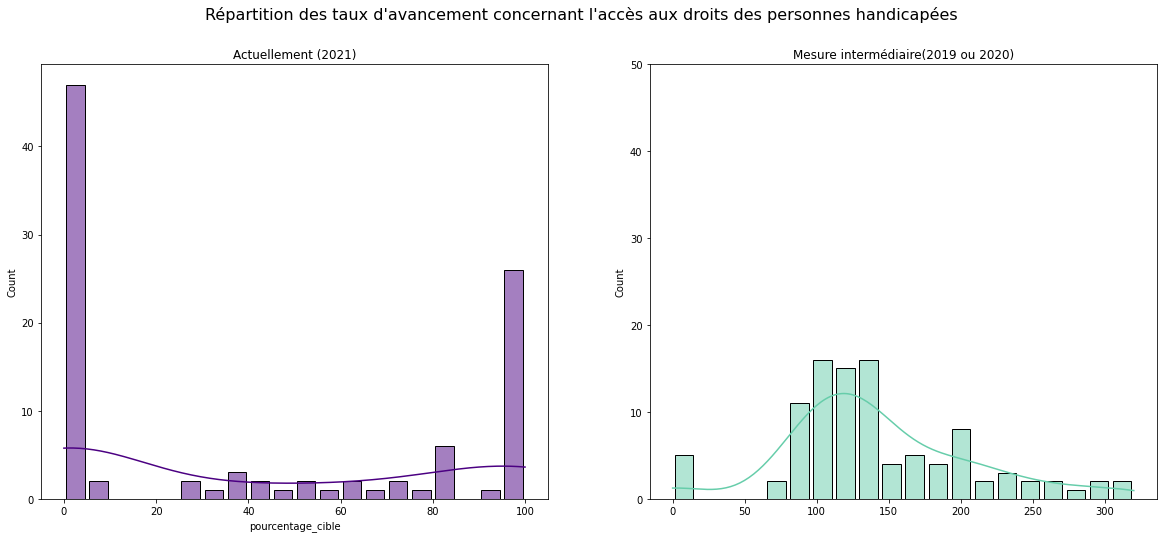

In [ ]:
# quels sont les taux d'avancement

fig10, ax = plt.subplots(figsize = (20,8))
fig10.suptitle("Répartition des taux d'avancement concernant l'accès aux droits des personnes handicapées", fontsize=16)

ax1 = plt.subplot(121)
ax1 = sns.histplot(df_5.pourcentage_cible,color = 'indigo',shrink=0.8,  multiple="dodge", kde=True, bins = 20)
ax1.set_title("Actuellement (2021)")

ax2 = plt.subplot(122)
ax2 = sns.histplot(data = df_5["progression_derniere_maj"]/df_5['cible']*100,color = 'mediumaquamarine', shrink=0.8,  multiple="dodge", kde=True, bins = 20)
ax2.set_title("Mesure intermédiaire(2019 ou 2020)")
ax2.set_ylim(ymax = 50)

fig10.show()

In [ ]:
# difficulté à lire ces graphes car valeur peut être positive ou négative. Je vois combien de dpt font mieux que la cible. ACTUELLEMENT

mieux = df_5[df_5['cible']>df_5['valeur_actuelle']]
bien = df_5[(df_5['pourcentage_cible']>=80)&(df_5['pourcentage_cible']<100)]

print ('le nombre de département qui actuellement a des délais de traitement plus court pour atteindre la cible:',len(mieux))
print ('le nombre de département qui rempli l\'objectif à 80% sans atteindre cible :', len(bien))

# et les mauvais élèves
bas = df_5[(df_5['pourcentage_cible']<=10)]
print ('le nombre de département qui actuellement atteind - de 10% de la cible:',len(bas))

le nombre de département qui actuellement a des délais de traitement plus court pour atteindre la cible: 22
le nombre de département qui rempli l'objectif à 80% sans atteindre cible : 9
le nombre de département qui actuellement atteind - de 10% de la cible: 49


In [ ]:
# IDEM en 2020
mieux = df_5[df_5['cible']>df_5['progression_derniere_maj']]
bien = df_5[(df_5["progression_derniere_maj"]/df_5['cible']*100>=80)&(df_5["progression_derniere_maj"]/df_5['cible']*100<100)]

print ('le nombre de département qui a des délais de traitement plus court pour atteindre la cible:',len(mieux))
print ('le nombre de département qui rempli l\'objectif à 80% sans atteindre cible :', len(bien))

# et les mauvais élèves
bas = df_5[df_5["progression_derniere_maj"]/df_5['cible']*100<=10]
print ('le nombre de département à atteindre - de 10%la cible:',len(bas))


le nombre de département qui a des délais de traitement plus court pour atteindre la cible: 19
le nombre de département qui rempli l'objectif à 80% sans atteindre cible : 12
le nombre de département à atteindre - de 10%la cible: 5


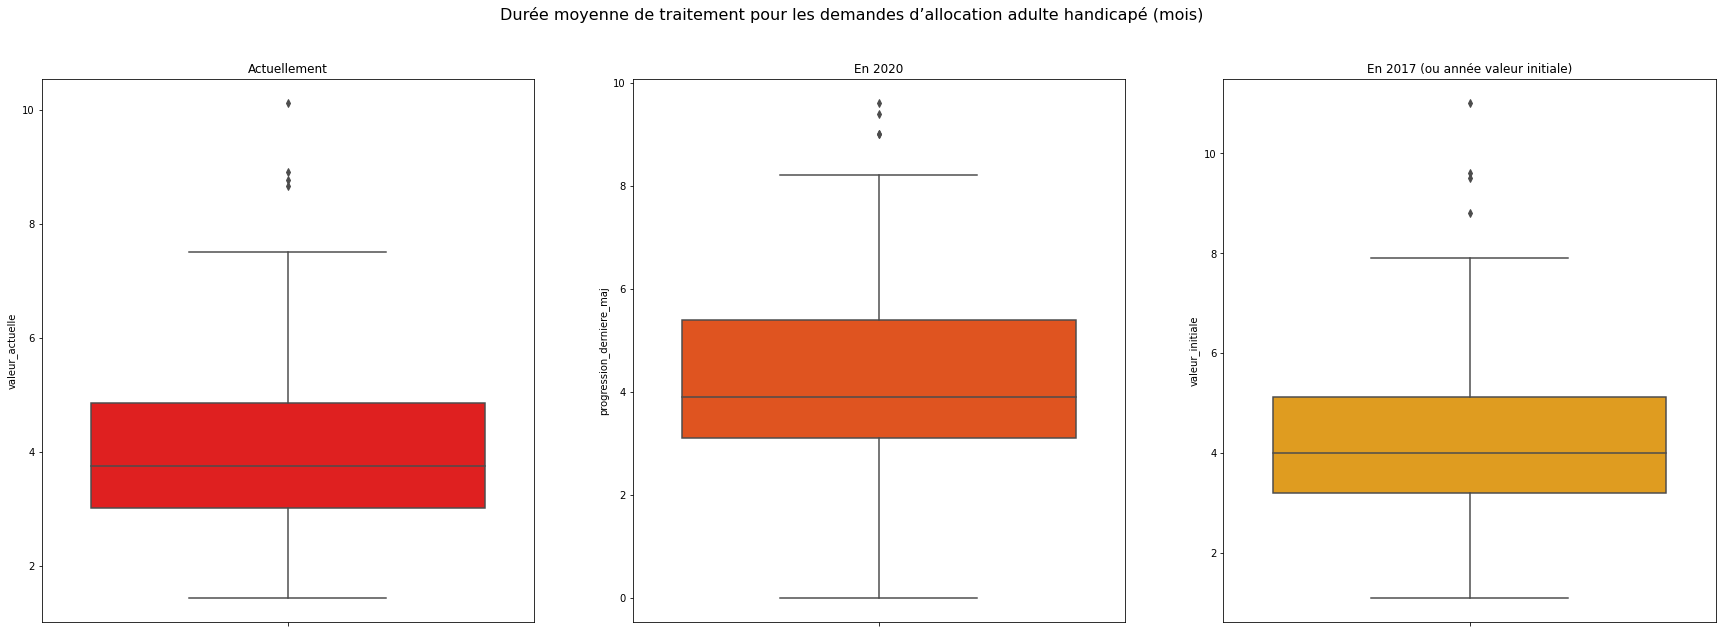

In [ ]:
# avec des boxplots pour vérifier que la distribution est de plus en plus normalisée autour de 3/4 mois (objectif national)

fig11, ax = plt.subplots(figsize = (30,10))
fig11.suptitle("Durée moyenne de traitement pour les demandes d’allocation adulte handicapé (mois)", fontsize=16)

ax1 = plt.subplot(131)
ax1 = sns.boxplot(data = df_5, y = "valeur_actuelle", color = 'red')
ax1.set_title("Actuellement")

ax2 = plt.subplot(132)
ax2 = sns.boxplot(data = df_5, y = "progression_derniere_maj", color = 'orangered')
ax2.set_title("En 2020")

ax3 = plt.subplot(133)
ax3 = sns.boxplot(data = df_5, y = "valeur_initiale", color = 'orange')
ax3.set_title("En 2017 (ou année valeur initiale)")

fig11.show()

In [ ]:
np.std(df_5.valeur_initiale)

1.7367126964469397

In [ ]:
np.std(df_5.progression_derniere_maj)

1.9586349838599326

In [ ]:
np.std(df_5.valeur_actuelle)

1.6378358006833282

Il s'agit d'une donnée qu'on ne peut que difficilement comparer à une cible car l'avancement peut varier en positif comme en négatif d'une prise de mesure à l'autre.

Si aujourd'hui, il semble y avoir beaucoup de département dont l'objectif est atteint, il y en a aussi beaucoup qui font moins bien qu'avant.
Et tout cela peut changer lors de la prochaine mesure courant 2022.

Il semble y avoir une sorte de convergence mais avec beaucoup de différence entre les départements.

In [ ]:
detail_5.to_csv('handicap-detail.csv', index = False)
df_5.to_csv('handicap.csv', index = False)

# A suivre

- ajouter écart type à indicateurs fibre
- revoir indicateurs des centres de santé car pas de maj progression en 2020
- revoir les jauges pour atteinte de + de 100%

A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analagous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.
estimation par noyau 